# topics:
- [Contours](#Contours)
- [Detector](#Detector)
----
slide 5


In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Contours

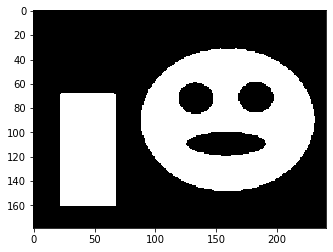

In [4]:
im = cv2.imread('session_11/contours.jpg' , 0)
ret, thresh = cv2.threshold(im, 127, 255, 0)
plt.imshow(thresh, cmap='gray')
plt.show()
# cv2.imshow('thresh',thresh)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

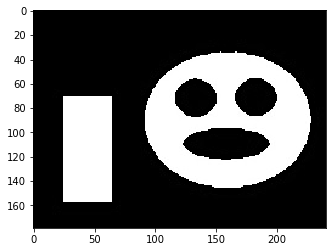

array([[[ 1, -1, -1, -1],
        [-1,  0,  2, -1],
        [ 3, -1, -1,  1],
        [ 4,  2, -1,  1],
        [-1,  3, -1,  1]]], dtype=int32)

In [5]:

contours,hierarchy= cv2.findContours(thresh, cv2.RETR_TREE,
                             cv2.CHAIN_APPROX_SIMPLE)

# drawing all contours
cv2.drawContours(im, contours, -1, (0,255,0), 3)
# cv2.imshow('all contours',im)
plt.imshow(im, cmap='gray')
plt.show()
image_internal = np.zeros(im.shape, im.dtype)
image_external = np.zeros(im.shape, im.dtype) 
hierarchy

In [ ]:

# drawing external contours and fill internal contours
for i in range(len(contours)):
     # have parent then is internal
     if hierarchy[0][i][3] >= 0:
         cv2.drawContours(image_internal, [contours[i]], 0, (255,0,0), -1)
     else:
         cv2.drawContours(image_external, [contours[i]], 0, (255,0,0), 3)

cv2.imshow('external',image_external)
cv2.imshow('internal',image_internal)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Detector

In [6]:

cap = cv2.VideoCapture(2)

# initialize a black canvas



# use this to capture a histogram
while True:
    _, frame = cap.read()
    frame = cv2.flip(frame, 1)
    frame = cv2.resize(frame, (1000, 600))

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, 'Place region of interest inside box & press `A`',(5, 50), font, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.rectangle(frame, (500, 100), (700, 300), (105, 105, 105), 2)
    box = frame[100:300, 500:700]

    cv2.imshow("Capture Histogram", frame)
    key = cv2.waitKey(10)
    if key == ord('a'):
        object_color = box
        cv2.destroyAllWindows()
        break
    if key == ord('q'):
        cv2.destroyAllWindows()
        cap.release()
        break

object_color_hsv = cv2.cvtColor(object_color, cv2.COLOR_BGR2HSV)
object_hist      = cv2.calcHist([object_color_hsv], [0, 1], None,[180, 256], [0, 180, 0, 256])

cv2.normalize(object_hist, object_hist, 0, 255, cv2.NORM_MINMAX)


# detect histogram
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # flip and resize the image.
    frame = cv2.flip(frame, 1)

    

    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # apply back projection to image using object_hist as
    # the model histogram
    object_segment = cv2.calcBackProject([hsv_frame], [0, 1], object_hist, [0, 180, 0, 256], 255)
    cv2.imshow("d", object_segment)
    #_, segment_thresh = cv2.threshold(object_segment, 10, 255, cv2.THRESH_BINARY)

    # apply some image operations to enhance image
    kernel = None
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

    closing = cv2.morphologyEx(object_segment, cv2.MORPH_OPEN, kernel)
    detected_hand = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel)
    detected_hand=cv2.GaussianBlur(detected_hand,(15,15),0)
    _, detected_hand = cv2.threshold(detected_hand, 10, 255, cv2.THRESH_BINARY)

    cv2.imshow("detected_hand", detected_hand)

    # find the contours
    contours, _ = cv2.findContours(detected_hand, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    palm_area = 0
    flag = None
    cnt = None

    # find the largest contour
    for i in range(len(contours)):
        c=contours[i]
        area = cv2.contourArea(c)
        if area > palm_area:
            palm_area = area
            flag = i

    if flag is not None and palm_area > 1000:
        cv2.drawContours(frame, [contours[flag]], 0, (0, 255, 0), 2)
        
    
    cv2.imshow("Detector", frame)

    k = cv2.waitKey(5)
    if k == ord('q'):
        break